In [1]:
data_path = 'Individual_2_GX010293_125_Hz.csv'
fs = 125.0  # Sampling frequency (Hz)
window_start = 1670698776296
window_end = 1670699768856 

Text(0.5, 1.0, 'Window of Data')

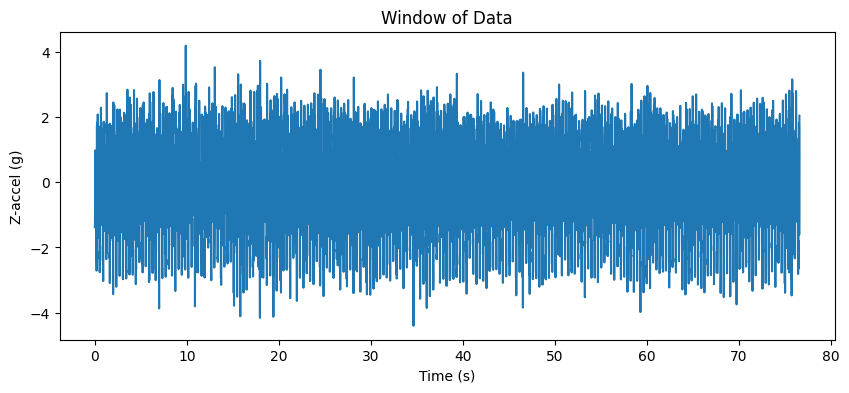

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(data_path)

# Plot the window for a single dog as a test
sig = df['az'].to_numpy()
t = df['epoch'].to_numpy()
t = (t - t[0])/1000

plt.figure(figsize=[10,4])
plt.plot(t, sig)
plt.ylabel('Z-accel (g)')
plt.xlabel('Time (s)')
plt.title('Window of Data')

Let's plot stance-stride with force data too? 

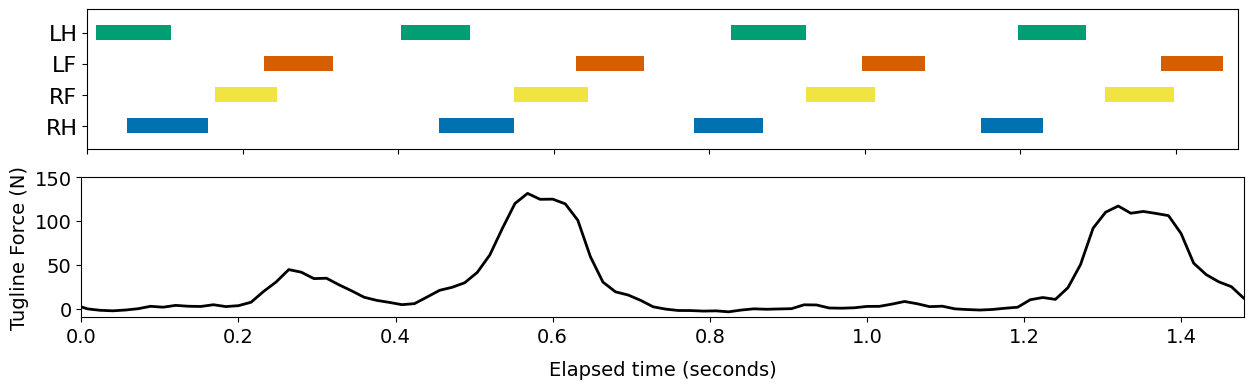

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Custom colors for each leg
colors = ['#FFFFFF', '#009E73', '#F0E442', '#0072B2', '#D55E00']  # White, LH, RF, RH, LF

# Create a colormap
cmap = mcolors.ListedColormap(colors)

# Data arrays
LF = df['LF'].to_numpy()[:, None]
RF = df['RF'].to_numpy()[:, None]
LH = df['LH'].to_numpy()[:, None]
RH = df['RH'].to_numpy()[:, None]
zero = np.zeros(np.shape(RH))

# Concatenate the leg arrays with zeros in between
temp = np.concatenate((zero, LH*1, zero, LF*4, zero, RF*2, zero, RH*3, zero), axis=1)

# Plot the data using the custom colormap
fig, (ax1, ax2) =plt.subplots(nrows=2, figsize=(15,4), sharex=True)
ax1.imshow(temp.T, origin='upper', cmap=cmap, interpolation='nearest', aspect=2.5)


# Convert x-tick labels to seconds
xlim0 = 2215
xlimN = xlim0 + (2400 - 2215)
tick_positions = [xlim0, xlim0+25, xlim0+50, xlim0+75, xlim0+100, xlim0+125, xlim0+150, xlim0+175]  # Example tick positions, adjust as needed
tick_labels = [(pos - xlim0) / 125 for pos in tick_positions]  # Convert to seconds

ax1.set_yticks([1, 3, 5, 7], labels=['LH', 'LF', 'RF', 'RH'], fontsize=16)

# Okay, now add the force data
raw = df['load'].to_numpy()
force = 0.00262*(raw - 86759.096) # for alice
ax2.plot(np.arange(len(force))[::2],force[::2],c='k',lw=2)
ax2.set_xticks(tick_positions, labels=tick_labels, fontsize=14)  # Format to 2 decimal places
ax2.set_xlabel('Elapsed time (seconds)', fontsize=14, labelpad=10)
ax2.set_xlim((xlim0,xlimN))
ax2.set_ylim((-10, 150))
ax2.set_yticks([0, 50, 100, 150], labels=[0, 50, 100, 150], fontsize=14)
ax2.set_ylabel('Tugline Force (N)', fontsize=14)

plt.show()
